In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
rng = np.random.default_rng()
from collections import Counter

Übung 11:

Gegeben ist eine diskrete Gleichverteilung mit Wertebereich WX ={1,2,3,...,m},wobeigilt P(X = k) = 1/m für alle k ∈ WX. m wird als unbekannt angenommen. Eine n-elementige Realisierung einer Stichprobe x1, x2, x3, . . . , xn wird gezogen. Mit Hilfe einer Simulation soll dargestellt werden, dass das Ergebnis von 10a) - mˆ = 2m ̄ − 1 ein unbiased Schätzer für m - auch numerisch in Ordnung ist.

In [2]:
Data = np.arange(1, 101)
Size = len(Data) #M

def Calc():
    Sample = rng.choice(Data, 10, replace=False)
    Estimator = 2*np.mean(Sample)-1
    return Estimator

Estimator_Avg = []

for elem in range(10000):
    Estimator_Avg.append(Calc())

print("M = ",np.mean(Estimator_Avg))


M =  99.90758000000001


Übung 12:

In einer Gruppe von Personen wählt jeder zufällig und unabhängig von den anderen 2 ”Freunde” aus. X bezeichnet die Anzahl der Personen, die von niemandem gewählt werden. Schätzen Sie den Erwartungswert von X durch eine geeignete Simulation.

In [3]:
Group = 10
cnt = Counter()
Result = []

for i in range(Group): #Guppe iterieren
    while True:
        e = np.random.randint(1, Group) #Ausschluss der wählenden Person
        if(e != i):
            #print(e)
            cnt[e] += 1
            break 
    while True:
        e2 = np.random.randint(1, Group) #Ausschluss der wählenden Person + erster Wahl
        if(e2 != i & e2 != e):
            #print(e2)
            cnt[e2] += 1
            break 

#print(cnt)
for i in range(Group):
    print(f"Friend: {i},\tElected: {cnt[i]}")
    
for i in range(Group): #Zähler wer keine Freunde hat
    if cnt[i] < 1:
        Result.append(0)
    else:
        Result.append(1)

#print(Result)  
print("E(X) - no Friends:", (1 - np.mean(Result)) * Group)

Friend: 0,	Elected: 0
Friend: 1,	Elected: 0
Friend: 2,	Elected: 1
Friend: 3,	Elected: 1
Friend: 4,	Elected: 3
Friend: 5,	Elected: 3
Friend: 6,	Elected: 1
Friend: 7,	Elected: 3
Friend: 8,	Elected: 5
Friend: 9,	Elected: 3
E(X) - no Friends: 1.9999999999999996


In [4]:
Group = 10
cnt = Counter()
Result = []

def Calc(Group):
    Result_tmp = []
    for i in range(Group): #Guppe iterieren
        while True:
            e = np.random.randint(1, Group) #Ausschluss der wählenden Person
            if(e != i):
                #print(e)
                cnt[e] += 1
                break 
        while True:
            e2 = np.random.randint(1, Group) #Ausschluss der wählenden Person + erster Wahl
            if(e2 != i & e2 != e):
                #print(e2)
                cnt[e2] += 1
                break 
    for i in range(Group): #Zähler wer keine Freunde hat
        if cnt[i] < 1:
            Result_tmp.append(0)
        else:
            Result_tmp.append(1)
    Result.append(1 - np.mean(Result_tmp))
    return Result

for elem in range(10000):
    Calc(Group)
            
#print(Result)     
print("E(X) - no Friends:", (np.mean(Result)) * Group)
#print(len(Result))
#print(np.add.reduce(Result))

E(X) - no Friends: 1.0


Hinweise: Zur Berechnung von Intervallschätzern kann man in Python die Bibliothek scipy.stats verwenden. Die Webpage https://docs.scipy.org/doc/scipy/reference/stats.html liefert eine umfassende Doku, inklusive der für uns sehr wichtigen Normalverteilung (norm), t- Verteilung (t) und Chi-Squared Verteilung (chi2). Für jede diese Verteilungen gibt es eine Funktion interval mit der man sich beschäftigen sollte.

Übung 13:

Plotte die Dichteverteilung einer (Student-) t-Verteilung und einer X2 (Chi-Squared) Verteilung, wobei für die Freiheitsgrade n die folgenden Werte angenommen werden sollen n ∈ {1, 2, 3, 4, 5, 10} . (Diese beiden Verteilungen sind eventuell unbekannt, daher kann etwas Backgroundrecherche nicht schaden ;-)) Des weiteren ist die Standardnormalverteilung N(0,1) ebenfalls in die jeweiligen Graphiken als "Overlay" zu plotten. Beantworte nun die folgenden Fragen:
• Kann N(0,1) durch eine t-Verteilung approximiert werden?
• Kann N(0,1) durch eine X2-Verteilung approximiert werden?
Falls "ja", wie kann dies erfolgen (eine graphische Erklärung könnte hilfreich sein)? Wenn "nein", warum?

     

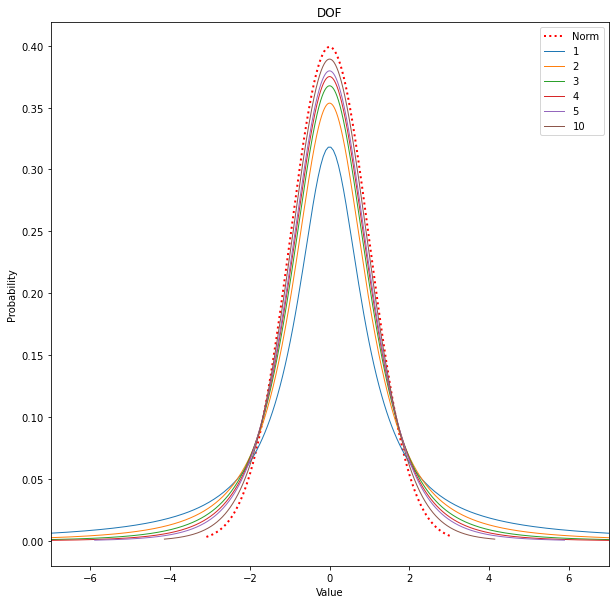

Ab DOF = 50 sind Norm & T ähnlich!


In [5]:
from scipy.stats import t, chi2, norm, stats

df = [1, 2, 3, 4, 5, 10] #Freiheitsgrade
min = 0.001
max = 0.999
values = 10000


x = np.linspace(norm.ppf(min), norm.ppf(max), values)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.plot(x, norm.pdf(x), 'r:', lw = 2, alpha = 1, label = 'Norm') #Normalverteilung

#T-Verteilung
for elem in df:
    x = np.linspace(t.ppf(min, df), t.ppf(max, df), values)

ax.plot(x, t.pdf(x, df), lw = 1, alpha = 1, label = df)

plt.title('DOF')
plt.legend(loc='best') 
plt.xlim(-7, 7)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

print("Ab DOF = 50 sind Norm & T ähnlich!")

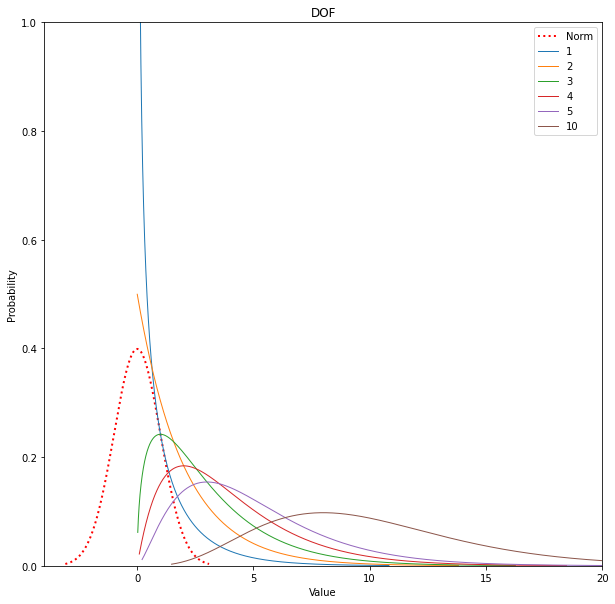

Keine Ähnlichkeit vorhanden!


In [6]:
df = [1, 2, 3, 4, 5, 10] #Freiheitsgrade
min = 0.001
max = 0.999
values = 10000


x = np.linspace(norm.ppf(min), norm.ppf(max), values)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.plot(x, norm.pdf(x), 'r:', lw = 2, alpha = 1, label = 'Norm') #Normalverteilung

#T-Verteilung
for elem in df:
    x = np.linspace(chi2.ppf(min, df), chi2.ppf(max, df), values)

ax.plot(x, chi2.pdf(x, df), lw = 1, alpha = 1, label = df)

plt.title('DOF')
plt.legend(loc='best')    
plt.ylim(0, 1)
plt.xlim(-4, 20)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

print("Keine Ähnlichkeit vorhanden!")

Übung 14:

Verwende das Beispiel vom Biometrischen Zugangssystem und berechne ein 99% KI. Wie viele Zutrittsversuche sind notwendig um zu beurteilen ob die Genauigkeit des KIs bei 2% liegt? Bestimme die Anzahl der Simulationen die für eine adäquate Genauigkeit notwendig sind und visualisiere das KI in Abhängigkeit von den Zutrittsversuchen.

10  Durchläufe:	Mittelwert:		 0.35930097680097683
10  Durchläufe:	Standardabweichung:	 0.21905603796234266
10  Durchläufe:	KI (99%):		 (0.17121732290006933, 0.5473846307018844) 

50  Durchläufe:	Mittelwert:		 0.4081743256743257
50  Durchläufe:	Standardabweichung:	 0.1655562331908073
50  Durchläufe:	KI (99%):		 (0.3472536689831748, 0.46909498236547664) 

100  Durchläufe:	Mittelwert:		 0.3793816877566878
100  Durchläufe:	Standardabweichung:	 0.20509974707426956
100  Durchläufe:	KI (99%):		 (0.3262853451334432, 0.4324780303799324) 



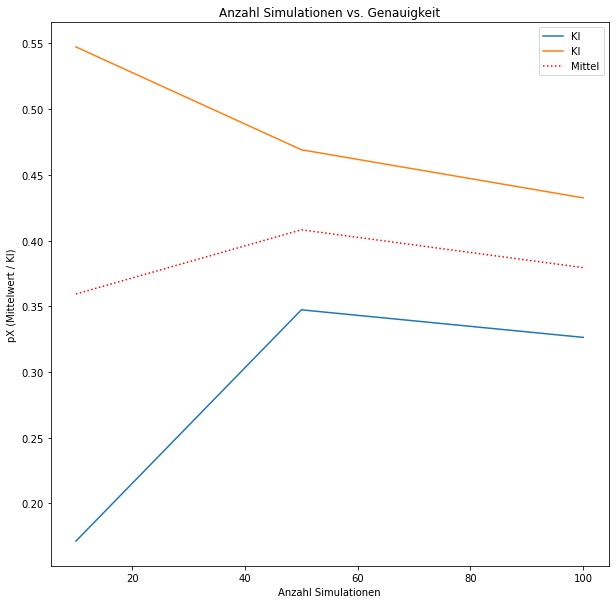

In [98]:
def personBerechtigt():    
    return rng.choice([0, 1], p = [(497 / 500), (3 / 500)])

def personDurchgelassen(istPersonBerechtigt):
    if istPersonBerechtigt:
        return rng.choice([0, 1], p = [(0.05), (0.95)])
    return rng.choice([0, 1], p = [(0.99), (0.01)])

def EinzelSim(n_Pers):
    dfe = pd.DataFrame(columns = ['Berechtigt', 'Durchgelassen'])
    for i in range(n_Pers):
        Berechtigt = personBerechtigt()
        Durchgelassen = personDurchgelassen(Berechtigt)
        dfe = dfe.append({'Berechtigt' : Berechtigt, 'Durchgelassen' : Durchgelassen}, ignore_index = True)
    Anzahl_Ber = len(dfe[(dfe["Berechtigt"] == True)])
    Anzahl_Ber_Durch = len(dfe[(dfe["Berechtigt"] == True) & (dfe["Durchgelassen"] == True)])
    Anzahl_UnBer_Durch = len(dfe[(dfe["Berechtigt"] == False) & (dfe["Durchgelassen"] == True)])
    pX = Anzahl_Ber / (Anzahl_Ber_Durch + Anzahl_UnBer_Durch)
    return pX

n_Pers = 500
n_Sim = [10, 50, 100]


def Sim(n_Pers, n_Sim):
    KI_Arr = []
    Mittel_Arr = []
    for n in n_Sim:
        Erg = []
        for elem in range(n):
            Erg.append(EinzelSim(n_Pers))
        #print(Erg)
        Mittel = np.average(Erg)
        StdAbw = np.std(Erg)
        StdFehler = stats.sem(Erg)
        KI = norm.interval(0.99, loc = Mittel, scale = StdFehler)
        KI_Arr.append(KI)
        Mittel_Arr.append(Mittel)
        print(n, " Durchläufe:\tMittelwert:\t\t", Mittel)
        print(n, " Durchläufe:\tStandardabweichung:\t", StdAbw)
        #print(n, " Durchläufe:\tStandardfehler:\t\t", StdFehler)
        print(n, " Durchläufe:\tKI (99%):\t\t", KI, "\n")
    x = n_Sim
    plt.figure(figsize = (10, 10))
    plt.title('Anzahl Simulationen vs. Genauigkeit')
    plt.xlabel('Anzahl Simulationen')
    plt.ylabel('pX (Mittelwert / KI)')
    plt.plot(x, KI_Arr, label = 'KI')
    plt.plot(x, Mittel_Arr, ':r', label = 'Mittel')
    plt.legend(loc = 'best')
    plt.show()

Sim(n_Pers, n_Sim)

Übung 15:

Erzeugt Stichproben der Größe n ∈ {100,1000,10000} aus einer Normalverteilung mit Erwartungswert 2 und Varianz 3. Berechne mit Hilfe von Python einen Punktschätzer für die Erwartungswerte und Varianzen der Stichproben, sowie 95% Konfidenzintervalle für den Mittelwert. Die Berechnung der KIs soll sowohl mit den geschätzten Varianzen als auch mit der angegebenen Varianz σ2 = 3 erfolgen.

Sample size:	 100
Mean:		 1.9957894523628326
Variance:	 2.5590885546772983
KI calc:	 (1.6806714962324611, 2.310907408493204)
KI orig:	 (1.656313732139981, 2.335265172585684)
Sample size:	 1000
Mean:		 1.965962581552169
Variance:	 3.1943862441029234
KI calc:	 (1.8551321407846892, 2.076793022319649)
KI orig:	 (1.8586109329291396, 2.0733142301751983)
Sample size:	 10000
Mean:		 2.023750397209463
Variance:	 2.9571850057554534
KI calc:	 (1.99004425455143, 2.0574565398674958)
KI orig:	 (1.9898028251871778, 2.057697969231748)


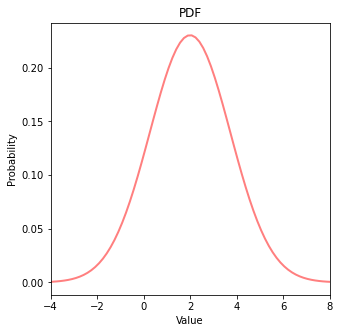

In [27]:
size = [100, 1000, 10000]

mu = 2
variance = 3
sigma = np.sqrt(variance)

for elem in size:
    sample = rng.normal(mu, sigma, elem)
    print("Sample size:\t", elem)
    print("Mean:\t\t", sample.mean())
    print("Variance:\t", sample.std() * sample.std())
    std_err_orig = sigma / np.sqrt(elem)
    std_err_calc = stats.sem(sample)
    print("KI calc:\t", norm.interval(alpha = 1 - 0.05, loc = sample.mean(), scale = std_err_calc))
    print("KI orig:\t", norm.interval(alpha = 1 - 0.05, loc = sample.mean(), scale = std_err_orig))
    
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
x = np.linspace(norm.ppf(0.0000000000000001), norm.ppf(0.9999999999999999), 100)
ax.plot(x, norm.pdf(x, loc = mu, scale = sigma), 'r-', lw = 2, alpha = 0.5, label = 'Norm')
plt.xlim(-4,8)
plt.title('PDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()